Import necessary modules

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score
import pprint
import seaborn as sns

In [15]:
# Load the dataset
dataset = pd.read_csv('datasets/prosody_old.csv')


In [16]:
dataset["class"] = dataset["source_file"].str[:4]
label_encoder = LabelEncoder()
dataset['class'] = label_encoder.fit_transform(dataset['class'])

In [17]:
# Drop rows with null values
dataset = dataset.dropna()

In [18]:
# Drop the 'source_file' column
dataset = dataset.drop(columns=['source_file'])

In [19]:
print(dataset.head())

        F0avg      F0std       F0max       F0min    F0skew    F0kurt  \
0  238.371429  44.012276  342.379425  177.752762  0.895443 -0.410455   
1   90.465897   7.410585  105.524254   68.620880 -1.015772  1.086469   
3  114.077538  10.912787  160.288971   88.383728  0.334190  1.025601   
4   98.129105  14.027131  128.930084   68.259491 -0.303015 -0.624684   
6  241.927292  33.384712  344.372009  159.186646  0.409021  0.481048   

   F0tiltavg    F0mseavg   F0tiltstd    F0msestd  ...  kurtosisdurpause  \
0  21.600249  703.871974  395.197341  695.230399  ...               0.0   
1 -23.174289   26.186505   11.607894   13.497239  ...               0.0   
3  -2.366647   64.925628   59.430141   31.850328  ...               0.0   
4 -85.227564   18.154519  115.933813   21.713159  ...               0.0   
6 -35.007253  585.866168  217.341286  994.011462  ...              -2.0   

   maxdurpause  mindurpause       PVU        PU       UVU       VVU        VP  \
0         0.00         0.00  0.0000

In [20]:
# Separate features and target variable
X = dataset.drop(columns=['class'])
y = dataset['class']
print(X.shape)

(710, 103)


In [21]:
# Normalize the feature data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [22]:
print(X_normalized.shape)

(710, 103)


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [24]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)


In [25]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X_normalized, y, cv=kf, scoring='accuracy')

array([0.91549296, 0.95070423, 0.8943662 , 0.91549296, 0.92957746])
Mean Accuracy: 0.9211267605633802
Confusion Matrix:
 [[57  3  0  0]
 [ 9 30  0  0]
 [ 0  0 13  1]
 [ 0  0  1 28]]


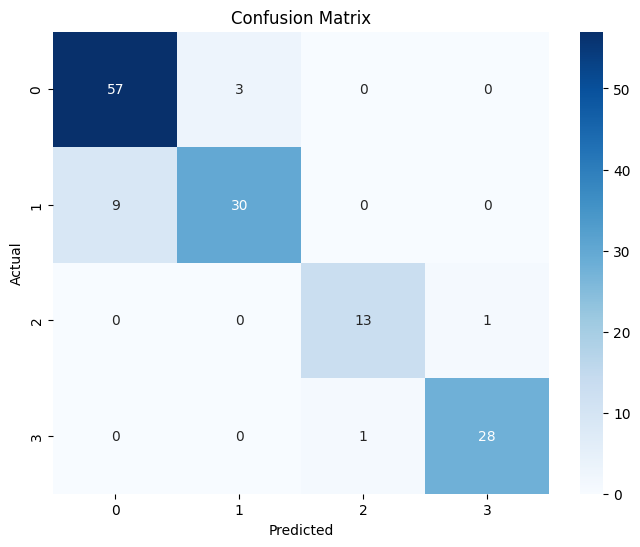

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        60
           1       0.91      0.77      0.83        39
           2       0.93      0.93      0.93        14
           3       0.97      0.97      0.97        29

    accuracy                           0.90       142
   macro avg       0.92      0.90      0.91       142
weighted avg       0.90      0.90      0.90       142



In [26]:
pprint.pp(scores)
print("Mean Accuracy:", scores.mean())

# Train-test split to evaluate detailed results
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))